In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel("data.xlsx")
data.head()

,Ms_Fe,Ms_CoPt,K_Fe,K_CoPt,Tc_Fe,Tc_CoPt,WE_Fe,WE_CoPt,BH_Fe,BH_CoPt,Hn
0,1514.515217,105.666376,4.079210,0.647207,905.237462,110.949695,2290.379082,4647.449964,0.433959,3.302074,0.065623
1,1504.279655,110.358897,4.051641,0.675948,899.119588,115.876842,2274.899993,4853.837813,0.431026,3.448716,0.132418
2,1493.159510,115.456958,4.021690,0.707174,892.472991,121.229806,2258.083161,5078.062242,0.427839,3.608030,0.199203
3,1480.020868,121.480404,3.986303,0.744067,884.619923,127.554425,2238.213786,5342.987246,0.424075,3.796263,0.274344
4,1465.704701,128.043690,3.947743,0.784268,876.063039,134.445874,2216.563658,5631.655619,0.419973,4.001365,0.349476


In [3]:
x=data.drop(['Hn'],axis=1)
y=data['Hn']

In [4]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Ms_Fe,Ms_CoPt,K_Fe,K_CoPt,Tc_Fe,Tc_CoPt,WE_Fe,WE_CoPt,BH_Fe,BH_CoPt
0,0.873040,0.126960,0.873040,0.126960,0.873040,0.126960,1.000000,0.150023,0.873040,0.126960
1,0.866066,0.133934,0.866066,0.133934,0.866066,0.133934,0.993071,0.156896,0.866066,0.133934
2,0.858490,0.141510,0.858490,0.141510,0.858490,0.141510,0.985543,0.164362,0.858490,0.141510
3,0.849538,0.150462,0.849538,0.150462,0.849538,0.150462,0.976649,0.173185,0.849538,0.150462
4,0.839784,0.160216,0.839784,0.160216,0.839784,0.160216,0.966958,0.182798,0.839784,0.160216


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=50)

In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
svr=SVR(kernel='poly',degree=6).fit(x_train,y_train)

In [8]:
y_pred=svr.predict(x_test)
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

0.05481151172512567
0.004517224510361388


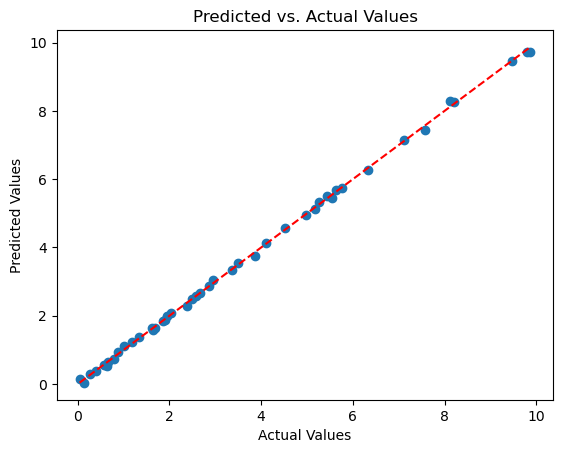

In [10]:
import matplotlib.pyplot as plt
y_pred = svr.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.show()